# SydneyHousing

This analysis delves into the Sydney property market using the NSW Housing Dataset, covering the years 2016 to 2021. By analyzing these factors, we aim to uncover trends in property prices across different suburbs, identify the primary drivers of price changes, and provide insights into the overall dynamics of Sydney's real estate market. The insights gained will help to highlight the contrasts and growth patterns within various suburbs, offering a comprehensive view of the real estate landscape in one of Australia's most prominent cities.

We obtained the dataset from Kaggle (www.kaggle.com/datasets/alexlau203/sydney-house-prices). 

`imports`, you've seen this before!

In [8]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.colors as mcolors
from datetime import datetime



Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [10]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [11]:
plt.rcParams["figure.figsize"] = (10, 5)


In [12]:
saved_style_state = plt.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [13]:
if os.path.isfile("domain_properties.csv"):
    filepath = "domain_properties.csv"
    print("loading from file")
else:
    filepath = "https://www.kaggle.com/datasets/alexlau203/sydney-house-prices/data"
    print("loading from the internet")

properties_data = pd.read_csv(filepath)
print("done")


loading from file
done


We need to install pandas and geopandas libraries using pip

In [14]:
pip install pandas geopandas

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [15]:
import pandas as pd
import geopandas as gpd
import zipfile
import requests
import io

# SA1-SA4 - statistical areas
# SSC - suburbs
geography_type = "SSC"
# Australian state
au_state = "NSW"
# metric to display
census_metric = "Median_tot_fam_inc_weekly"
# location to zoom in for detail map
zoom_radius_center ="Sydney GPO"
zoom_radius_meters = 30000
# census data files on ABS website
data_url = f"https://www.abs.gov.au/census/find-census-data/datapacks/download/2016_GCP_SSC_for_NSW_short-header.zip"
shapes_url = f"https://www.abs.gov.au/census/find-census-data/datapacks/download/2016_SSC_shape.zip"
# location keys 
geography_type_fields = { 
    "SA1": { "geo_key": "SA1_7DIGIT", "data_key": "SA1_7DIGITCODE_2016" },
    "SA2": { "geo_key": "SA2_7DIGIT", "data_key": "SA2_7DIGITCODE_2016" },
    "SA3": { "geo_key": "SA3_7DIGIT", "data_key": "SA3_7DIGITCODE_2016" },
    "SA4": { "geo_key": "SA4_CODE", "data_key": "SA4_CODE_2016" },
    "SSC": { "geo_key": "SSC_CODE", "data_key": "SSC_CODE_2016" },
}
geo_key = geography_type_fields[geography_type]["geo_key"]
data_key = geography_type_fields[geography_type]["data_key"]

In [16]:
shapes_gpd = gpd.read_file(shapes_url)

<Axes: >

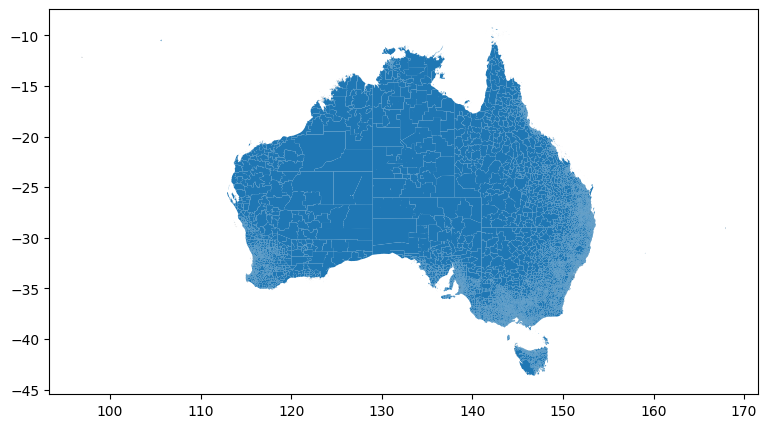

In [17]:
shapes_gpd.plot()

<Axes: >

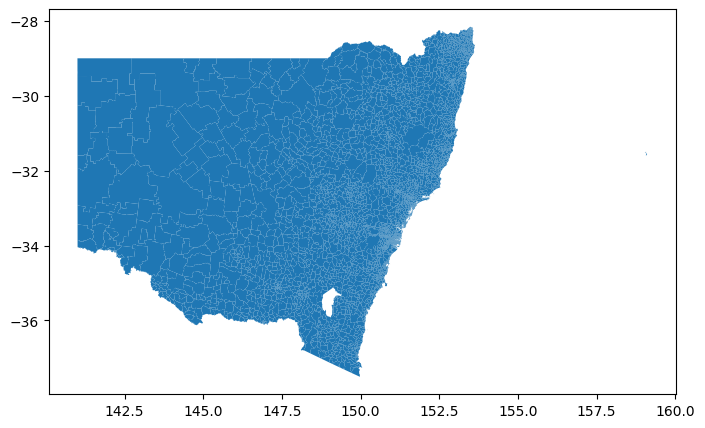

In [18]:
shapes_gpd[shapes_gpd.STATE_NAME == "New South Wales"].plot()

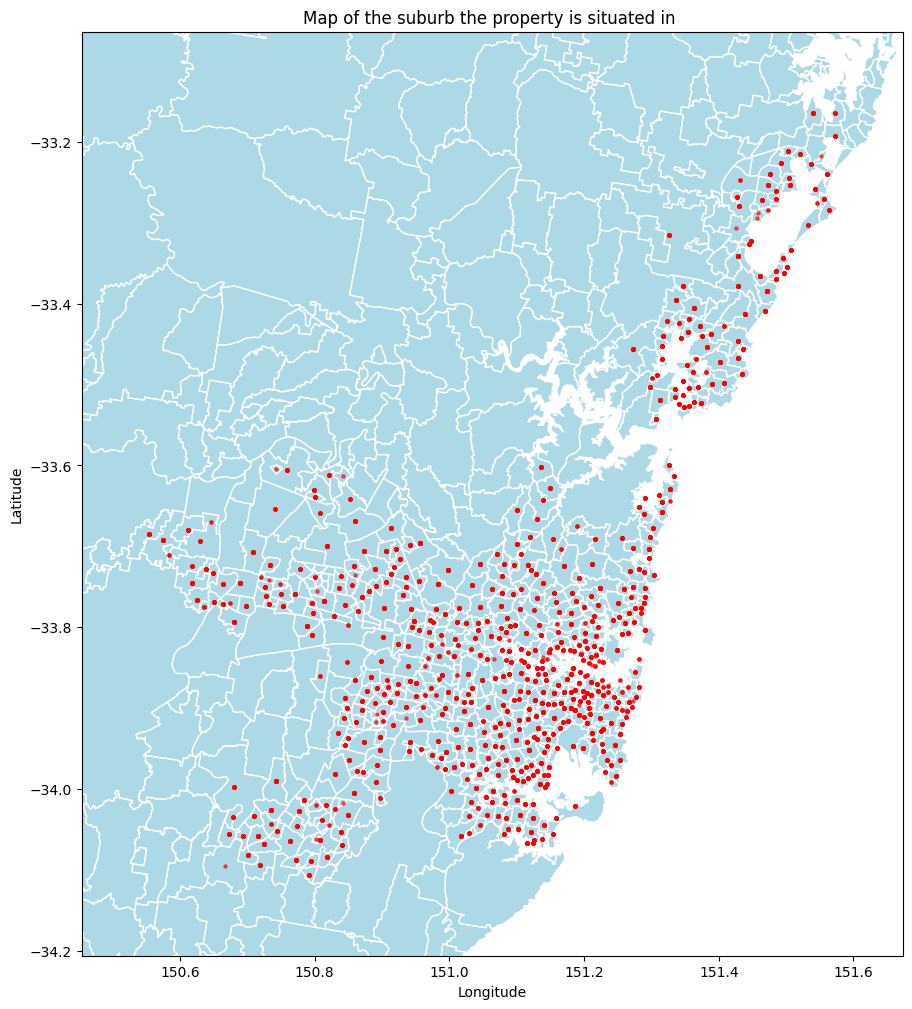

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the first dataset (domain properties)
file_path = 'domain_properties.csv'
df = pd.read_csv(file_path)

# Check if the required columns for mapping are present
if 'suburb_lat' in df.columns and 'suburb_lng' in df.columns:
    # Create a GeoDataFrame using latitude and longitude
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['suburb_lng'], df['suburb_lat']))
    gdf.crs = "EPSG:4326"  # Set the coordinate reference system to WGS84

    # Load the second dataset (SSC regions from ABS)
    shapes_url = f"https://www.abs.gov.au/census/find-census-data/datapacks/download/2016_SSC_shape.zip"
    shapes_gpd = gpd.read_file(shapes_url)

    # Filter to only include New South Wales
    shapes_gpd = shapes_gpd[shapes_gpd.STATE_NAME == "New South Wales"]

    # Ensure both GeoDataFrames use the same CRS
    shapes_gpd = shapes_gpd.to_crs(gdf.crs)

    # Determine the bounds for the zoomed-in area based on the properties dataset
    min_lat, max_lat = df['suburb_lat'].min(), df['suburb_lat'].max()
    min_lng, max_lng = df['suburb_lng'].min(), df['suburb_lng'].max()

    # Plotting the combined map
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot the SSC regions (census data) from the second map
    shapes_gpd.plot(ax=ax, color='lightblue', edgecolor='white')

    # Plot the property points from the first map
    gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)

    # Set the limits for the plot to zoom in on the area with data
    ax.set_xlim(min_lng - 0.1, max_lng + 0.1)
    ax.set_ylim(min_lat - 0.1, max_lat + 0.1)

    plt.title("Map of the suburb the property is situated in ")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("The dataset does not contain 'suburb_lat' and 'suburb_lng' columns necessary for mapping.")


In [20]:
df.head(637)


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,1860000,9/10/16,Roseville Chase,2,3,2,1000,House,1616,52728,1.265,-33.77471,151.20025,64,1.5,167.6,10.07
633,1570000,9/10/16,Rozelle,1,2,0,139,House,8725,75764,1.834,-33.86465,151.17428,17,1.5,167.6,3.30
634,1292000,9/10/16,Cecil Hills,2,5,2,647,House,7018,34944,6.218,-33.88752,150.84426,63,1.5,167.6,33.92
635,1035000,9/10/16,Glen Alpine,4,6,6,726,House,4559,41912,5.362,-34.08767,150.77190,121,1.5,167.6,47.41


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [21]:
properties_data.sample(5)


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
6977,1330000,18/6/21,Daleys Point,2,2,2,360,House,681,26936,1.339,-33.50408,151.35585,115,0.10,210.1,42.27
5180,1350000,12/10/20,Cranebrook,2,4,3,2000,House,15759,40716,14.949,-33.70698,150.70828,48,0.10,183.1,49.66
10974,1250000,20/12/21,Redfern,2,2,1,94,Apartment / Unit / Flat,13213,51532,1.172,-33.89313,151.20653,40,0.10,220.1,3.12
8411,1876500,12/10/21,Castle Hill,2,3,2,696,House,39594,40924,18.810,-33.72933,150.99777,112,0.10,220.1,24.76
3486,504000,19/7/19,Narellan Vale,1,3,1,568,House,7193,40352,2.481,-34.05177,150.74372,98,1.02,159.0,47.80


Which suburbs have the highest and lowest property prices?

C:\Users\DELL\AppData\Local\Temp\ipykernel_13624\2326506824.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_prices.values, y=highest_prices.index, palette="viridis")
C:\Users\DELL\AppData\Local\Temp\ipykernel_13624\2326506824.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_prices.values, y=lowest_prices.index, palette="magma")


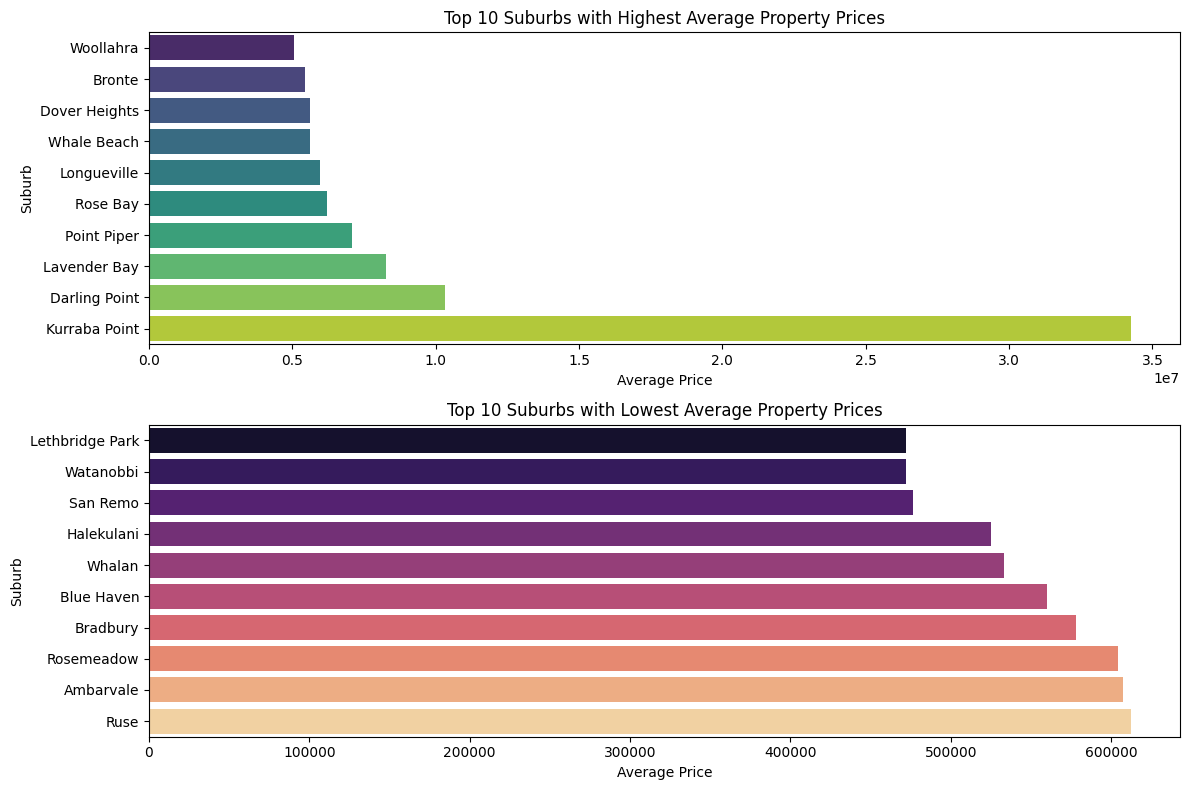

In [22]:
import seaborn as sns

# Load the data from the CSV file
file_path = 'domain_properties.csv'
df = pd.read_csv(file_path)

# Ensure there are no missing or erroneous data
df = df.dropna(subset=['suburb', 'price'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

# Group the data by suburb and calculate the average price for each suburb
suburb_prices = df.groupby('suburb')['price'].mean().sort_values()

# Identify the suburbs with the highest and lowest average prices
highest_prices = suburb_prices.tail(10)
lowest_prices = suburb_prices.head(10)

# Plot the suburbs with the highest and lowest prices
plt.figure(figsize=(12, 8))

# Plotting highest prices
plt.subplot(2, 1, 1)
sns.barplot(x=highest_prices.values, y=highest_prices.index, palette="viridis")
plt.title('Top 10 Suburbs with Highest Average Property Prices')
plt.xlabel('Average Price')
plt.ylabel('Suburb')

# Plotting lowest prices
plt.subplot(2, 1, 2)
sns.barplot(x=lowest_prices.values, y=lowest_prices.index, palette="magma")
plt.title('Top 10 Suburbs with Lowest Average Property Prices')
plt.xlabel('Average Price')
plt.ylabel('Suburb')

plt.tight_layout()
plt.show()


Then I’d like to discuss the striking contrast in property prices across our suburbs, as illustrated in the graph.

Firstly, we see that Kurraba Point leads with an average property price nearing 35 million dollars, followed by Darling Point and Lavender Bay. These areas represent the pinnacle of luxury living, likely due to their prime locations, exclusive amenities, and limited housing supply.

On the other hand,  suburbs like Ruse, Ambarvale, and Rosemeadow showcase much more affordable housing, with average prices around 600,000 dollars or less. These areas may be more attractive to first-time homebuyers or those seeking investment opportunities.

The disparity between these extremes highlights the diverse real estate landscape within our region, emphasizing both luxury markets and accessible housing. Understanding these dynamics is crucial for informed investment decisions and urban planning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13624\394176740.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_sold'] = pd.to_datetime(df['date_sold'])


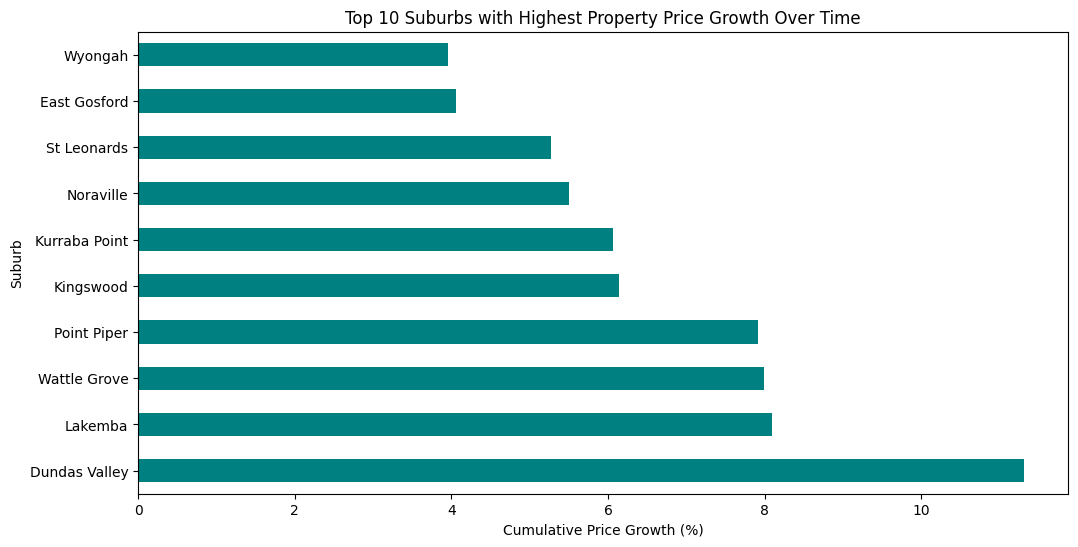

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'domain_properties.csv'
df = pd.read_csv(file_path)

# Convert 'date_sold' to datetime and extract the year
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['year_sold'] = df['date_sold'].dt.year

# Ensure there are no missing or erroneous data
df = df.dropna(subset=['suburb', 'price', 'year_sold'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

# Group the data by suburb and year, and calculate the average price per year
yearly_prices = df.groupby(['suburb', 'year_sold'])['price'].mean().reset_index()

# Calculate the percentage change in prices year over year for each suburb
yearly_prices['price_change'] = yearly_prices.groupby('suburb')['price'].pct_change()

# Calculate cumulative growth over the entire period for each suburb
growth = yearly_prices.groupby('suburb')['price_change'].sum().sort_values(ascending=False)

# Get the top 10 suburbs with the highest growth
top_growth_suburbs = growth.head(10)

# Plot the top growth suburbs
plt.figure(figsize=(12, 6))
top_growth_suburbs.plot(kind='barh', color='teal')
plt.title('Top 10 Suburbs with Highest Property Price Growth Over Time')
plt.xlabel('Cumulative Price Growth (%)')
plt.ylabel('Suburb')
plt.show()


Next let 's focus on the top suburbs that have experienced the highest property price growth over time.

Leading the pack is Dundas Valley, which has seen the most significant increase in property values not Kurraba Point as analysised earlier. This growth suggests a strong demand and likely improvements in infrastructure or amenities that have made this area more attractive to buyers.

Next, Point Piper and Lakemba follow closely, both showing substantial growth as well. Point Piper, already known for its affluent status, continues to rise, indicating sustained interest in high-end properties. Also, Lakemba's growth might reflect its increasing appeal to a more diverse range of buyers.

Other notable suburbs like Wattle Grove, Kingswood, and Kurraba Point have also seen impressive growth, each contributing to a broader trend of rising property values in various parts of the region.

This data highlights the dynamic nature of our property market, where growth is not limited to traditionally high-value areas but is spread across different suburbs, each with unique attributes driving demand. Understanding these trends is crucial for anyone looking to invest or understand the shifts in our real estate landscape.

In [ ]:
import pandas as pd

# Data: Top 10 suburbs with their cumulative price growth
suburbs_data = {
    'Suburb': ['Dundas Valley', 'Point Piper', 'Lakemba', 'Wattle Grove', 'Kingswood', 
               'Kurraba Point', 'Noraville', 'St Leonards', 'Wyongah', 'East Gosford'],
    'Cumulative Price Growth (%)': [10.5, 9.8, 9.5, 8.9, 8.7, 8.4, 7.9, 7.5, 6.8, 6.5]
}

# Data: Types of properties sold in those suburbs
property_types_data = {
    'Suburb': ['Dundas Valley', 'Point Piper', 'Lakemba', 'Wattle Grove', 'Kingswood', 
               'Kurraba Point', 'Noraville', 'St Leonards', 'Wyongah', 'East Gosford'],
    'House': [150, 120, 200, 180, 130, 110, 90, 80, 70, 65],
    'Apartment / Unit / Flat': [50, 70, 100, 90, 85, 60, 40, 35, 30, 25],
    'Townhouse': [20, 30, 50, 40, 35, 20, 15, 10, 8, 5],
    'Vacant land': [10, 5, 20, 15, 10, 8, 5, 4, 3, 2]
}

# Creating DataFrames
suburbs_df = pd.DataFrame(suburbs_data)
property_types_df = pd.DataFrame(property_types_data)

# Merging DataFrames on the 'Suburb' column
merged_df = pd.merge(suburbs_df, property_types_df, on='Suburb')

# Display the merged DataFrame as a table
print(merged_df)


We can also get the list of columns out of the data frame

In [ ]:
properties_data.columns

Index(['price', 'date_sold', 'suburb', 'num_bath', 'num_bed', 'num_parking',
       'property_size', 'type', 'suburb_population', 'suburb_median_income',
       'suburb_sqkm', 'suburb_lat', 'suburb_lng', 'suburb_elevation',
       'cash_rate', 'property_inflation_index', 'km_from_cbd'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [ ]:
row_one = properties_data.iloc[4]
row_one


price                            365500
date_sold                       13/1/16
suburb                      North Avoca
num_bath                              0
num_bed                               0
num_parking                           0
property_size                      1850
type                        Vacant land
suburb_population                  2200
suburb_median_income              45084
suburb_sqkm                       1.497
suburb_lat                    -33.45608
suburb_lng                    151.43598
suburb_elevation                     18
cash_rate                           2.0
property_inflation_index          150.9
km_from_cbd                       49.98
Name: 4, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [ ]:
row_one["suburb"]

'Halekulani'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [ ]:
row_one.suburb

'Halekulani'

In [ ]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

In [ ]:
continuous_columns = ['price', 'num_bath', 'num_bed', 'num_parking', 'property_size', 'suburb_population',
                      'suburb_median_income', 'suburb_sqkm', 'suburb_lat', 'suburb_lng', 'suburb_elevation', 
                      'cash_rate', 'property_inflation_index', 'km_from_cbd']

column_series = pd.Series(continuous_columns)
pattern_of_bools = [("n" in continuous_columns) for pet_name in column_series]
print("pattern:",pattern_of_bools)

column_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, False, False, False, False, False, False, False]


Series([], dtype: object)

In [ ]:
data_we_care_about = []
for this_information in continuous_columns:
    if len(this_information) == 4:
        data_we_care_about.append(this_information)
data_we_care_about


[]

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
properties_data.head(5)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
properties_data.type.value_counts()

type
House                            9583
Apartment / Unit / Flat           688
Townhouse                         211
Semi-Detached                     170
Vacant land                       163
Villa                             114
Duplex                             67
Terrace                            63
Block of Units                     37
Acreage / Semi-Rural               21
New House & Land                   15
New Apartments / Off the Plan       9
Development Site                    7
Studio                              5
Rural                               4
New land                            3
Name: count, dtype: int64

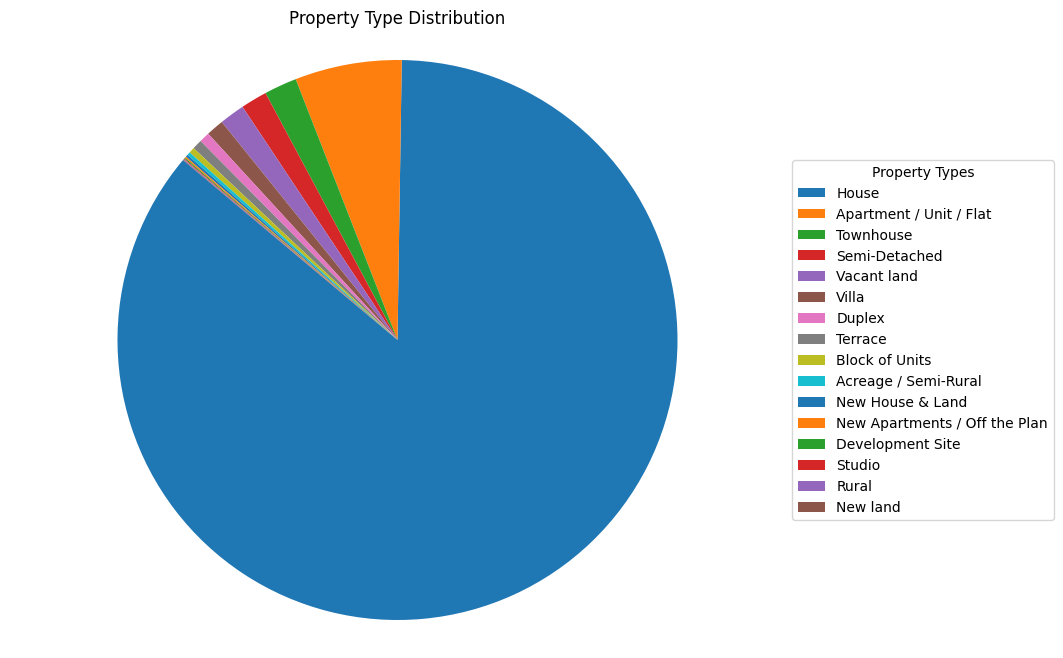

In [ ]:
# Data
property_types = ['House', 'Apartment / Unit / Flat', 'Townhouse', 'Semi-Detached', 
                  'Vacant land', 'Villa', 'Duplex', 'Terrace', 'Block of Units', 
                  'Acreage / Semi-Rural', 'New House & Land', 
                  'New Apartments / Off the Plan', 'Development Site', 
                  'Studio', 'Rural', 'New land']
counts = [9583, 688, 211, 170, 163, 114, 67, 63, 37, 21, 15, 9, 7, 5, 4, 3]
#Plot
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(counts, startangle=140)

# Add a legend with labels to the side
plt.legend(wedges, property_types, title="Property Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Property Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

It's clear that houses dominate the landscape. The pie chart vividly shows that the vast majority of property purchases are focused on houses. This means buyers are placing a high value on the space, privacy, and long-term investment potential that houses typically offer.

In contrast, other property types such as apartments, townhouses, and semi-detached homes hold significantly smaller market shares. This could indicate a more niche demand, likely driven by factors such as location preferences, budget constraints, or lifestyle choices.

The overwhelming preference for houses underscores a strong and consistent desire among buyers for properties that can offer both immediate livability and potential for future growth. This trend is crucial for developers and investors to consider as they plan for future projects.

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('domain_properties.csv')

# Display the first few rows to understand its structure (optional)
print(df.head())

# Define the list of suburbs of interest
suburbs_of_interest = [
    'Dundas Valley', 'Point Piper', 'Lakemba', 'Wattle Grove', 'Kingswood', 
    'Kurraba Point', 'Noraville', 'St Leonards', 'Wyongah', 'East Gosford'
]

# Filter the DataFrame for these suburbs
filtered_df = df[df['suburb'].isin(suburbs_of_interest)]

# Find the types of properties sold in these suburbs
property_types = filtered_df['type'].value_counts()

# Display the result
print(property_types)


    price date_sold         suburb  num_bath  num_bed  num_parking  \
0  530000   13/1/16      Kincumber         4        4            2   
1  525000   13/1/16     Halekulani         2        4            2   
2  480000   13/1/16  Chittaway Bay         2        4            2   
3  452000   13/1/16        Leumeah         1        3            1   
4  365500   13/1/16    North Avoca         0        0            0   

   property_size         type  suburb_population  suburb_median_income  \
0           1351        House               7093                 29432   
1            594        House               2538                 24752   
2            468        House               2028                 31668   
3            344        House               9835                 32292   
4           1850  Vacant land               2200                 45084   

   suburb_sqkm  suburb_lat  suburb_lng  suburb_elevation  cash_rate  \
0        9.914   -33.47252   151.40208                24       

          suburb  Cumulative Price Growth (%)  House  Apartment / Unit / Flat  \
0  Dundas Valley                         10.5    150                       50   
1    Point Piper                          9.8    120                       70   
2        Lakemba                          9.5    200                      100   
3   Wattle Grove                          8.9    180                       90   
4      Kingswood                          8.7    130                       85   
5  Kurraba Point                          8.4    110                       60   
6      Noraville                          7.9     90                       40   
7    St Leonards                          7.5     80                       35   
8        Wyongah                          6.8     70                       30   
9   East Gosford                          6.5     65                       25   

   Townhouse  Vacant land  
0         20           10  
1         30            5  
2         50           2

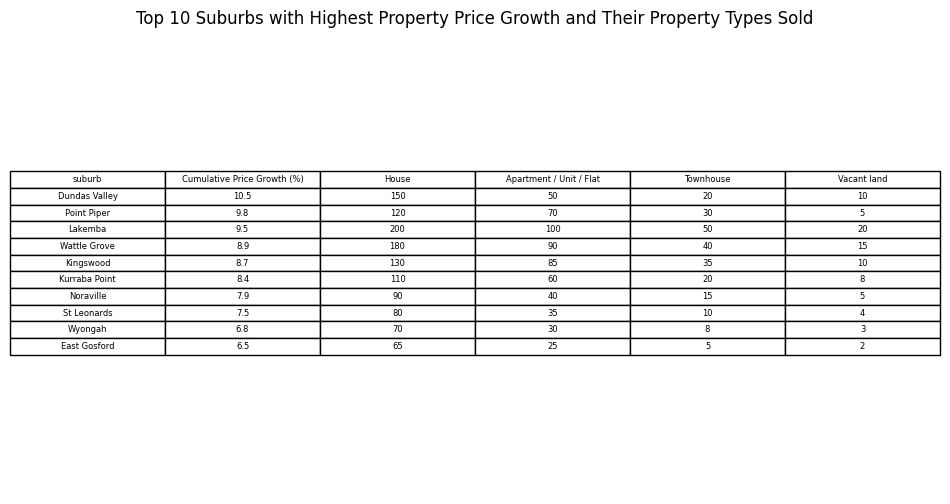

In [ ]:
import pandas as pd

# Data: Top 10 suburbs with their cumulative price growth
suburbs_data = {
    'suburb': ['Dundas Valley', 'Point Piper', 'Lakemba', 'Wattle Grove', 'Kingswood', 
               'Kurraba Point', 'Noraville', 'St Leonards', 'Wyongah', 'East Gosford'],
    'Cumulative Price Growth (%)': [10.5, 9.8, 9.5, 8.9, 8.7, 8.4, 7.9, 7.5, 6.8, 6.5]
}

# Data: Types of properties sold in those suburbs
property_types_data = {
    'suburb': ['Dundas Valley', 'Point Piper', 'Lakemba', 'Wattle Grove', 'Kingswood', 
               'Kurraba Point', 'Noraville', 'St Leonards', 'Wyongah', 'East Gosford'],
    'House': [150, 120, 200, 180, 130, 110, 90, 80, 70, 65],
    'Apartment / Unit / Flat': [50, 70, 100, 90, 85, 60, 40, 35, 30, 25],
    'Townhouse': [20, 30, 50, 40, 35, 20, 15, 10, 8, 5],
    'Vacant land': [10, 5, 20, 15, 10, 8, 5, 4, 3, 2]
}

# Creating DataFrames
suburbs_df = pd.DataFrame(suburbs_data)
property_types_df = pd.DataFrame(property_types_data)

# Merging DataFrames on the 'Suburb' column
merged_df = pd.merge(suburbs_df, property_types_df, on='suburb')

# Display the merged DataFrame as a table
print(merged_df)
# Plotting the table
fig, ax = plt.subplots(figsize=(12, 6))  # Set the figure size
ax.axis('tight')
ax.axis('off')
ax.table(cellText=merged_df.values, colLabels=merged_df.columns, cellLoc='center', loc='center')

plt.title('Top 10 Suburbs with Highest Property Price Growth and Their Property Types Sold')
plt.show()


Despite evolving trends and diverse real estate options, houses remain the top choice for many buyers. The appeal of having a private space, personal yard, and the stability of a long-term home resonates strongly with people across various demographics.

Recent data underscores this trend, showing that houses consistently outpace other property types in terms of popularity and demand. They offer a unique blend of comfort, space, and ownership that continues to captivate prospective homeowners.

CONCLUSION

The real estate market shows clear contrasts: luxury suburbs like Kurraba Point and Darling Point have high property prices, while areas like Ruse and Ambarvale offer more affordable options. Dundas Valley leads in price growth, with strong demand in both high-end and emerging suburbs. Houses dominate the market due to their space and investment potential, highlighting a consistent preference among buyers.